<div style="border:solid blue 2px; padding: 20px">
<font color='blue'>Привет, Софья!</font>

Твоё решение проверил <font color='blue'>Александр Цымбалов</font>

Если у тебя будут какие-то <font color='blue'>вопросы</font>, то обязательно их <font color='blue'>задавай</font>

Я буду обращаться к тебе на "ты", ведь все мы здесь студенты)
Но если тебе некомфортно, то дай знать, пожалуйста
<br><br>
Мои комментарии будут в отдельных ячейках <font color='blue'>Markdown</font> с заголовком «Комментарий ревьюера».

**Пожалуйста, не перемещай, не изменяй и не удаляй их**. 
Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера ❌:</b> Замечания, которые необходимо обработать, иначе я не смогу принять проект </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера ⚠️:</b> Небольшие замечания или вопросы по пониманию темы. Если есть желание и время, то у тебя есть возможность сделать проект ещё лучше </div>

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Хвалебные отзывы или другого рода комментарии)</div>

**Если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом.**

Мне будет <font color='blue'> легче </font> отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Лучше в таком формате, но как тебе <font color='blue'> удобно </font></div></font>

Версии комментариев я буду нумеровать

<br>

<div style="border:solid blue 2px; padding: 20px">
<font color='blue'>Итог 1 ревью</font>
    
Определенно хорошая работа! Ты здорово проанализировала данные, предобработала их, обучила модели и выбрала самую лучшую. Отдельно хочу похвалить за использование catboost и подробное комментирование шагов! Есть проблемы, которые необходимо исправить:
    <ul>
        <li>Порядок очистки и лемматизации</li>
        <li>Catboost (либо победить и получить результат, либо удалить код)</li>
    </ul>
Удачи! Жду на второе ревью!

<div class="alert alert-info"> <b>Комментарий студента:</b> Исправила все критические ошибки и доп. комментарии, получилось обучить модель CatBoost, спасибо за совет. И за ревью. <font color='blue'> 

<div style="border:solid green 2px; padding: 20px">
<font color='blue'>Итог 2 ревью</font>
    
Ошибки были исправлены! Здорово, что у нас получилось обучить ещё и catboost. <br>Спасибо, что прислушалась к моим комментариям. Удачи на курсе!

## Проект для "Викишоп" (без BERT)

<div class="alert alert-warning">
<b>1 Комментарий ревьюера ⚠️:</b> Для того, чтобы превратить текст в заголовок, между названием и "#" должен быть пробел </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> исправила <font color='blue'> 

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

Импортирую все необходимые библиотеки для реализации проекта.

In [3]:
#pip install catboost

     |████████████████████████████████| 76.6 MB 44 kB/s 


In [4]:
import pandas as pd
import numpy as np
import spacy
import re


# Install spaCy (run in terminal/prompt)
import sys
!{sys.executable} -m pip install spacy
# Download spaCy's  'en' Model
!{sys.executable} -m spacy download en
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 12.0 MB 8.0 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Загружаю исходные данные, преобразовываю их в датафрейм и вывожу первые 5 строк для ознакомления с данными.

In [5]:
try:
  data = pd.read_csv('/content/toxic_comments.csv')
except FileNotFoundError as e:
    print(e)
    data = pd.read_csv('/datasets/toxic_comments.csv')

<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> Круто, что ты не просто используешь try/except, но и ловишь конкретную ошибку</div>


In [6]:
data.head()

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


In [7]:
data.isna().sum()

text     0
toxic    0
dtype: int64

In [8]:
data.shape

(159571, 2)

Исходные данные состоят из двух столбцов и 159571 строк с заполненными данными.

- text - текст комментария (латиницей)
- toxic - признак негативного комментария (1-комментарий токсичный, 0-комментарий нормальный)

Чтобы алгоритмы умели определять тематику и тональность текста, их нужно обучить на корпусе (англ. corpus). Это набор текстов, в котором эмоции и ключевые слова уже размечены.
Создадим корпус постов. Преобразуем столбец text в список текстов.

<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> Верный анализ задачи!</div>


In [9]:
corpus = data['text'].values

От лишних символов текст очистят регулярные выражения. Это инструмент для поиска слова или числа по шаблону. Он определяет, из каких частей состоит строка и какие в них символы. В лемматизированном тексте твита нужно оставить только символы латиницей и пробелы. Чтобы их найти, напишем регулярное выражение.  После этой операции в тексте можно обнаружить лишние пробелы, для анализа они — помеха. Пробелы устраняются комбинацией функций join() и split().

In [11]:
def clear_text(text):
    text=re.sub(r'[^a-zA-Z]', ' ', text)
    text=text.split()
    return " ".join(text)

In [13]:
data['text'] = data['text'].apply(clear_text)

Так как все комментарии в исходных данных написаны на английском языке, библиотека pymystem3 для лемматизации не подойдет, так как она ориентирвоана на русский язык. 

Самостоятельно мной была изучена библиотека spaCy для лемматизации английских комментариев. spaCy является относительно новым пакетом и на данный момент считается стандартом в индустрии NLP. Он поставляется с предварительно созданными моделями, которые могут анализировать текст и выполнять различный функционал, связанный с NLP. Для работы с англоязычными комментариями была загружена специальная модель "en". spaCy по умолчанию определяет часть речи и назначает соответствующую лемму, поэтому не нуждается в дополнительных POS-тегах.

<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> Правильно! pymystem3 тут не подойдет, но spacy как раз для нашей задачи! </div>


In [ ]:
# nlp = spacy.load('en', disable=['parser', 'ner'])

In [10]:
# код ревьюера, различия в версиях библиотек

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [14]:
def lemmatize(text):
  doc = nlp(text)
  return " ".join([token.lemma_ for token in doc])

In [15]:
data['lemma'] = data['text'].apply(lemmatize)

<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> Всё верно! Регулярным выражением достаточно просто можно избавиться от проблемных символов</div>


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> Лемматизация и очистка текста отличная!</div>

<div class="alert alert-danger">
<b>1 Комментарий ревьюера ❌:</b> Сначала нужно очистить текст, а потом делать лемматизацию. Слова с цифрой, странным символом на конце, буквами в разном регистре могут ломать лемматизатор? Советую проверить пример: went, go, 9go, 1wEnt, 3went3, GoinG, going</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> исправила порядок обработки текста<font color='blue'> 

<div class="alert alert-success">
<b>2 Комментарий ревьюера ✔️:</b> Отлично!</div>


Так как spaCy заменяет все местоимения на PRON, я удалю это слово из комментариев, чтобы оно не влияло на метрику TFIDF.

<div class="alert alert-warning">
<b>1 Комментарий ревьюера ⚠️:</b> Из-за разницы в версиях библиотек это уже неактуально </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> хм, все еще остались -PRON- даже с использованием кода ревьюера. поэтому снова прогнала код удаления. <font color='blue'> 

<div class="alert alert-success">
<b>2 Комментарий ревьюера ✔️:</b> Что-то странное, я использовал твой код для местоимения ¯\_(ツ)_/¯<br>Ладно, нам это не вредит. Так тоже можно делать</div>


In [17]:
data['lemma'] = data['lemma'].str.replace('-PRON-','')

In [18]:
data.head()

,text,toxic,lemma
0,Explanation Why the edits made under my userna...,0,explanation why the edit make under username ...
1,D aww He matches this background colour I m se...,0,D aww match this background colour m seeming...
2,Hey man I m really not trying to edit war It s...,0,hey man m really not try to edit war s just ...
3,More I can t make any real suggestions on impr...,0,More can t make any real suggestion on improv...
4,You sir are my hero Any chance you remember wh...,0,sir be hero any chance remember what page t...


Чтобы преобразовать корпус текстов в мешок слов, обратимся к классу CountVectorizer(). У больших корпусов и мешки слов выходят большие, но часть слов в них может быть бессмысленной. Чаще всего от союзов, предлогов итд можно избавиться, причём тема текста и смысл предложения не изменятся. Когда мешок слов меньше и чище, проще найти слова, важные для классификации текстов.

Чтобы почистить мешок слов, найдём стоп-слова, то есть слова без смысловой нагрузки. Их много, и для каждого языка — свои. Вызовем функцию stopwords.words(), передадим ей аргумент 'english', то есть англоязычные стоп-слова (так как комментарии в исходных данных на английском языке).

In [19]:
count_vect = CountVectorizer()
bow = count_vect.fit_transform(corpus)

print("Размер мешка без учёта стоп-слов:", bow.shape)

Размер мешка без учёта стоп-слов: (159571, 168790)


In [20]:
stop_words = set(stopwords.words('english'))
count_vect = CountVectorizer(stop_words=stop_words)
bow = count_vect.fit_transform(corpus)
print("Размер мешка с учётом стоп-слов:", bow.shape)

Размер мешка с учётом стоп-слов: (159571, 168645)


<div class="alert alert-warning">
<b>1 Комментарий ревьюера ⚠️:</b> Круто, что ты не забыла такой способ работы с текстом! Ты ведь не используешь дальше мешок слов? </div>

<div class="alert alert-info"> <b>Комментарий студента:</b> дальше не использую. <font color='blue'> 

<div class="alert alert-success">
<b>2 Комментарий ревьюера ✔️:</b> Хорошо</div>


Мешок слов совсем немного, но очистился.

##Обучение моделей

Разделю выборки на обучаемую и тестовую, размер тестовой выборки будет 25%. Проверю корректность разбивки, посмотрев на размеры выборок методом shape.

In [21]:
train, test = train_test_split(data, test_size=0.25, random_state=12345)

<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> Правильное разбиение на выборки!</div>


In [22]:
train.shape

(119678, 3)

In [23]:
test.shape

(39893, 3)

In [24]:
train['corpus'] = train['lemma'].values
test['corpus'] = test['lemma'].values

Оценка важности слова определяется величиной TF-IDF. То есть TF отвечает за количество упоминаний слова в отдельном тексте, а IDF отражает частоту его употребления во всём корпусе. Формула TFIDF следующая:
 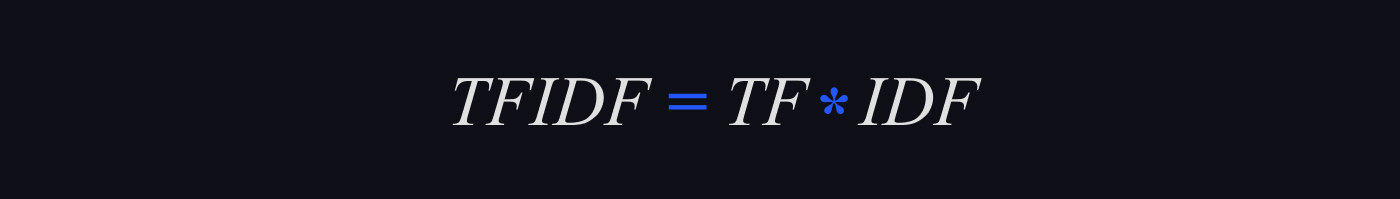
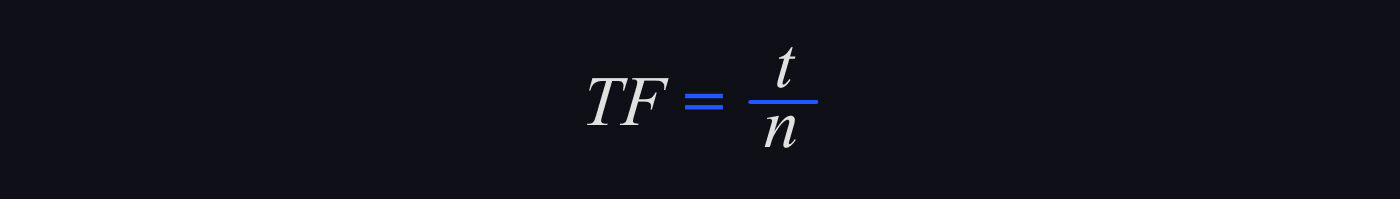
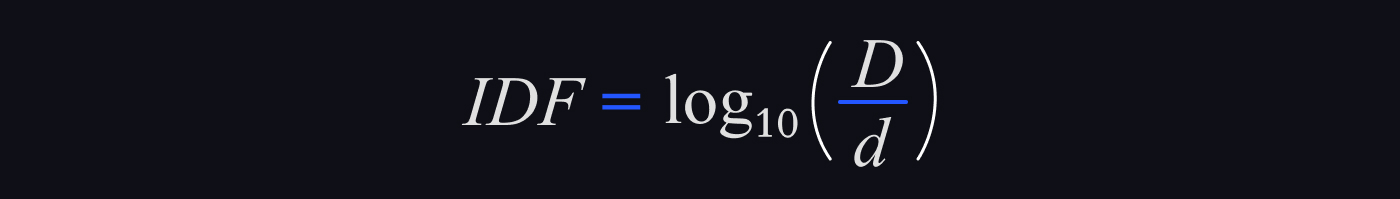

IDF нужна в формуле, чтобы уменьшить вес слов, наиболее распространённых в любом другом тексте заданного корпуса. Большая величина TF-IDF говорит об уникальности слова в тексте по отношению к корпусу. Чем чаще оно встречается в конкретном тексте и реже в остальных, тем выше значение TF-IDF.
Функцию fit() для TFIDF запускаю только на обучающей выборке, иначе тестирование будет нечестным:в модели будут учтены частоты слов из тестовой выборки.


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> Правильное определение TFIDF. Здорово, что ты в конце также упомянула о проблеме утечки тестовых данных! Верно, обучим только на train выборке для предотвращения утечки информации о частоте слов из теста</div>


In [25]:
count_tf_idf = TfidfVectorizer(stop_words=stop_words)
tf_idf_train = count_tf_idf.fit_transform(train['corpus'])

In [26]:
tf_idf_train.shape

(119678, 133246)

Выделю целевой признак для каждой выборки.

In [27]:
target_train = train['toxic']
target_test = test['toxic']

In [28]:
tf_idf_test = count_tf_idf.transform(test['corpus'])
tf_idf_test.shape

(39893, 133246)

Проверю баланс классов для целевого признака обучающей выборки. Алгоритмы машинного обучения считают все объекты обучающей выборки равнозначными по умолчанию. Если важно указать, что какие-то объекты важнее, их классу присваивается вес. Если баланс классов далек от равнозначного, в модели используется параметр clss_weight='balanced'.

<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> Нашла дисбаланс в таргете, а также предложила способ борьбы с ним через взвешивание весов!</div>


In [29]:
target_train.value_counts(normalize=True)

0    0.898578
1    0.101422
Name: toxic, dtype: float64

####Логистическая регрессия

In [ ]:
model_lr = LogisticRegression()
parameters = {'fit_intercept':[True,False], 
              'penalty':['l1','l2','elasticnet','none'], 
              'C':[1,1.5,2], 
              'random_state':[12345], 
              'class_weight':['balanced'],
              'solver':['liblinear', 'saga', 'lbfgs']}
cv = 3
search = GridSearchCV(estimator=model_lr, 
                      param_grid=parameters, 
                      cv=cv, 
                      scoring='f1', 
                      verbose=1)
result = search.fit(tf_idf_train, target_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Score: 0.7615517251082418
Best Hyperparameters: {'C': 2, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l2', 'random_state': 12345, 'solver': 'saga'}


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> Круто, что ты подбираешь гиперпараметры через GridSearchCV, а также сразу кросс-валидируешься. Неплохие результаты обучения!</div>


Проверяю модель на тестовой выборке.

In [ ]:
model_lr = LogisticRegression(fit_intercept=True,
                              C=2,
                              penalty='l2',
                              random_state=12345,
                              solver='saga',
                              class_weight='balanced')
model_lr.fit(tf_idf_train, target_train)
predictions = model_lr.predict(tf_idf_test)
result = f1_score(target_test, predictions)
print('F1 score для Логистической Регрессии: ',result)

F1 score для Логистической Регрессии:  0.7629002090438991


<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> Порог пройден!</div>


#### CatBoost

In [30]:
target_train_cb = target_train
features_train_cb = train['lemma']
target_test_cb = target_test
features_test_cb = test['lemma']

In [35]:
target_train_cat = pd.DataFrame(data=target_train, columns = ['toxic'])
target_test_cat = pd.DataFrame(data=target_test, columns = ['toxic'])

In [31]:
features_train_cat = pd.DataFrame(data=features_train_cb,columns = ['lemma'])

In [33]:
features_test_cat = pd.DataFrame(data=features_test_cb,columns = ['lemma'])

In [34]:
parameters = {'eval_metric':'F1',
              'text_features': ['lemma'],
              'random_state':12345,
              'verbose':100}

model_cb = CatBoostClassifier(**parameters)

<div class="alert alert-danger">
<b>1 Комментарий ревьюера ❌:</b> В text_features нужно передать название столбца с текстовыми данными, а для этого необходимо train и test привести к pd.Dataframe (одно из решений твоей проблемы)</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> исправила, все вышло. <font color='blue'> 

<div class="alert alert-success">
<b>2 Комментарий ревьюера ✔️:</b> Супер!</div>


In [36]:
model_cb.fit(features_train_cat, target_train_cat)

Learning rate set to 0.079478
0:	learn: 0.6938138	total: 421ms	remaining: 7m 1s
100:	learn: 0.7389595	total: 38.4s	remaining: 5m 41s
200:	learn: 0.7624553	total: 1m 19s	remaining: 5m 14s
300:	learn: 0.7750655	total: 1m 57s	remaining: 4m 33s
400:	learn: 0.7836225	total: 2m 36s	remaining: 3m 54s
500:	learn: 0.7920283	total: 3m 14s	remaining: 3m 13s
600:	learn: 0.7986251	total: 3m 52s	remaining: 2m 34s
700:	learn: 0.8028910	total: 4m 30s	remaining: 1m 55s
800:	learn: 0.8080651	total: 5m 8s	remaining: 1m 16s
900:	learn: 0.8130282	total: 5m 45s	remaining: 38s
999:	learn: 0.8157751	total: 6m 22s	remaining: 0us


In [37]:
test_pred = model_cb.predict(features_test_cat)

In [40]:
f1 = f1_score(target_test_cat, test_pred)
print('F1 метрика на тестовой выборке модели CatBoost:',f1)

F1 метрика на тестовой выборке модели CatBoost: 0.7838383838383838


####Случайный лес

In [ ]:
model_forest = RandomForestClassifier(random_state=12345)
    
parametrs = {'n_estimators': range(50, 81, 10),'max_depth': [6,10,14]}
search = GridSearchCV(estimator=model_forest, 
                      param_grid=parametrs,
                      cv=3, 
                      verbose=1, 
                      scoring='f1')
result = search.fit(tf_idf_train, target_train)

print('Best Score для модели случайного леса: %s' % result.best_score_)
print('Best Hyperparameters для модели случайного леса: %s' % result.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Score для модели случайного леса: 0.0004941118406809578
Best Hyperparameters для модели случайного леса: {'max_depth': 14, 'n_estimators': 50}


In [ ]:
model_lr = RandomForestClassifier(random_state=12345,
                                  max_depth=14,
                                  n_estimators=50)
model_lr.fit(tf_idf_train, target_train)
predictions = model_lr.predict(tf_idf_test)
result = f1_score(target_test, predictions)
print('F1 score для Случайного леса: ',result)

F1 score для Случайного леса:  0.0


##Вывод

Среди рассмотренных моделей, лучший результат показала модель CatBoostClassifier, метрика F1 на тестовой выборке показала результат 0.7838 , что выше требуемого значения (0.75). Поэтому я бы выбрала данную модель для классификации тональности комментариев. Следующий лучший результат у модели Логистической Регрессии с подобранными гиперпараметрами. Таким образом, метрика F1 на тестовой выборке показала результат 0.7629, что так же выше требуемого значения (0.75). Моедль Случайного леса показала совершенно неприемлемый результат метрики F1, это произошло из-за того, что количество перебираемых гиперпараметров слишком мало, а для большего количества требуется больше времени и ресурсов для обучения.

<div class="alert alert-success">
<b>1 Комментарий ревьюера ✔️:</b> Отличный вывод!</div>


<div class="alert alert-success">
<b>2 Комментарий ревьюера ✔️:</b> Всё верно!</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> исправила вывод с учетом успешно обученной модели CatBoost. <font color='blue'> 